In [1]:
%load_ext autoreload
%autoreload 2

# Dataset

In [2]:
import pandas as pd
from pathlib import Path

DATASET_FOLDER = Path('data/the_movies_dataset')

SMALL_DATASET = True

RATINGS_FILEPATH = DATASET_FOLDER / 'ratings_small.csv' if SMALL_DATASET else DATASET_FOLDER / 'ratings.csv'
MOVIES_FILEPATH = DATASET_FOLDER / 'movies_metadata.csv'
LINKS_FILEPATH = DATASET_FOLDER / 'links_small.csv' if SMALL_DATASET else DATASET_FOLDER / 'links.csv'
KEYWORDS_FILEPATH = DATASET_FOLDER / 'keywords.csv'
CREDITS_FILEPATH = DATASET_FOLDER / 'credits.csv'

In [3]:
ratings = pd.read_csv(RATINGS_FILEPATH)
movies = pd.read_csv(MOVIES_FILEPATH)
keywords = pd.read_csv(KEYWORDS_FILEPATH)
credits = pd.read_csv(CREDITS_FILEPATH)

C:\Users\subru\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Item-based Collaborative filtering

In [4]:
from recommmender_system_project.item_item_recommender_system import ItemItemRecommenderSystem

In [5]:
# movies_metadata_dataframe = movies.copy()
# movies_metadata_dataframe.id = movies_metadata_dataframe.id.astype(int, errors='ignore')
# movies_metadata_dataframe.id.isnull()

In [6]:
item_item_based = ItemItemRecommenderSystem(ratings, movies, keywords, credits)

starting init
init base
create movies base
removing date vals
converting data types
merging data 
handling date
drop columns
converting for movie id
aggregating movie id
group by movie id
end of create movies base
end init base
make embedding
ending embedding
make embedding
ending embedding
ending init


## Similar Movies LSH- Jacard

In [22]:
# item_item_based.recommend_similar_movies('Zombie Flesh Eaters-Zombi 2-it-1979', 10, 'LSH-J')
item_item_based.recommend_similar_movies('American Pie-American Pie-en-1999', 10, 'LSH-J')

Query movie name American Pie-American Pie-en-1999


,adult,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,vote_average,vote_count,keywords,cast,crew,userId,movieId,rating,timestamp,movie_id
5267,False,2800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",3034,tt0072431,9.339316,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1974-12-15,86273333.0,...,7.7,880.0,"[{'id': 1706, 'name': 'experiment'}, {'id': 30...","[{'cast_id': 17, 'character': 'Dr. Frederick F...","[{'credit_id': '52fe437ec3a36847f8058739', 'de...",4,3034,5.0,949949444,Young Frankenstein-Young Frankenstein-en-1974
5622,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 35, 'n...",2640,tt0097493,13.311827,"[{'name': 'New World Pictures', 'id': 1950}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1988-10-01,1108462.0,...,7.3,387.0,"[{'id': 236, 'name': 'suicide'}, {'id': 2913, ...","[{'cast_id': 4, 'character': 'Veronica Sawyer'...","[{'credit_id': '52fe4361c3a36847f804ffbb', 'de...",4,2640,5.0,949810261,Heathers-Heathers-en-1988
15167,False,5115000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",2161,tt0060397,12.538410,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1966-08-24,12000000.0,...,6.7,108.0,"[{'id': 339, 'name': 'submarine'}, {'id': 732,...","[{'cast_id': 11, 'character': 'Grant', 'credit...","[{'credit_id': '52fe433cc3a36847f8044a6f', 'de...",4,2161,5.0,949896070,Fantastic Voyage-Fantastic Voyage-en-1966
16427,False,25000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2140,tt0271027,7.637345,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2001-07-06,64437847.0,...,6.4,304.0,"[{'id': 90, 'name': 'paris'}, {'id': 549, 'nam...","[{'cast_id': 18, 'character': 'Liu Jian', 'cre...","[{'credit_id': '52fe433ac3a36847f8043ed3', 'de...",4,2140,5.0,949896070,Kiss of the Dragon-Kiss of the Dragon-en-2001
17498,False,0,"[{'id': 18, 'name': 'Drama'}]",3537,tt0080716,5.511557,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1980-05-16,21202829.0,...,6.0,97.0,"[{'id': 1346, 'name': 'dance performance'}, {'...","[{'cast_id': 3, 'character': 'Angelo', 'credit...","[{'credit_id': '52fe4399c3a36847f8060d31', 'de...",30,3537,4.0,957566237,Fame-Fame-en-1980
18560,False,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",2565,tt0099892,9.019396,"[{'name': 'Amblin Entertainment', 'id': 56}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1990-03-09,39404261.0,...,5.5,150.0,"[{'id': 10685, 'name': 'escape'}, {'id': 17319...","[{'cast_id': 1, 'character': 'Joe Banks', 'cre...","[{'credit_id': '593fe28ec3a368040a00dc7d', 'de...",99,2565,3.0,947519597,Joe Versus the Volcano-Joe Versus the Volcano-...
22495,False,140000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",616,tt0325710,19.582325,"[{'name': 'Cruise/Wagner Productions', 'id': 4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2003-12-05,456758981.0,...,7.3,1946.0,"[{'id': 233, 'name': 'japan'}, {'id': 1327, 'n...","[{'cast_id': 11, 'character': 'Captain Nathan ...","[{'credit_id': '52fe425ec3a36847f8018e53', 'de...",2,616,3.0,835355932,The Last Samurai-The Last Samurai-en-2003
24971,False,5000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",4553,tt0361862,10.737565,"[{'name': 'Filmax Entertainment', 'id': 7302},...","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-02-09,8203235.0,...,7.3,1280.0,"[{'id': 1382, 'name': 'factory'}, {'id': 4142,...","[{'cast_id': 1, 'character': 'Trevor Reznik', ...","[{'credit_id': '52fe43cbc3a36847f80704e9', 'de...",41,4553,4.5,1107100717,The Machinist-The Machinist-en-2004
26923,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 37, ...",1676,tt0063811,4.010324,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1967-12-19,0.0,...,6.4,20.0,"[{'id': 1822, 'nam

## Similar Movies LSH- Cosine

In [24]:
item_item_based.recommend_movies_to_user(10, 10, 'LSH-C')

C:\Users\subru\OneDrive\Desktop\recommender_system_project-master\notebooks\recommmender_system_project\item_item_recommender_system.py:188: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_movies_df = self.movies_dataframe[self.movies_dataframe.userId == user_id]


,adult,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,vote_average,vote_count,keywords,cast,crew,userId,movieId,rating,timestamp,movie_id
2847,False,1400000,"[{'id': 18, 'name': 'Drama'}]",705,tt0042192,12.063080,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1950-11-09,63463.0,...,8.0,367.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 1523,...","[{'cast_id': 12, 'character': 'Margo Channing'...","[{'credit_id': '564bd2afc3a3686024005567', 'de...",187,705,2.5,1233449634,All About Eve-All About Eve-en-1950
6847,False,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1639,tt0120179,11.268531,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-06-13,164508066.0,...,4.1,439.0,"[{'id': 1422, 'name': 'boat'}, {'id': 2799, 'n...","[{'cast_id': 1, 'character': 'Annie Porter', '...","[{'credit_id': '557f51349251412f0e00015f', 'de...",6,1639,2.0,1109258179,Speed 2: Cruise Control-Speed 2: Cruise Contro...
7872,False,25000000,"[{'id': 18, 'name': 'Drama'}]",380,tt0095953,11.267467,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1988-12-11,412800000.0,...,7.6,1762.0,"[{'id': 30, 'name': 'individual'}, {'id': 791,...","[{'cast_id': 4, 'character': 'Raymond Babbitt'...","[{'credit_id': '52fe423cc3a36847f800e92d', 'de...",4,380,3.0,949810534,Rain Man-Rain Man-en-1988
8733,False,17000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",97,tt0084827,16.574021,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-07-09,33000000.0,...,6.6,717.0,"[{'id': 282, 'name': 'video game'}, {'id': 215...","[{'cast_id': 1, 'character': 'Kevin Flynn/Clu'...","[{'credit_id': '52fe4217c3a36847f8003345', 'de...",19,97,4.0,855190550,Tron-Tron-en-1982
8777,False,30000000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",2907,tt0101272,12.962525,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1991-11-22,191502426.0,...,6.7,871.0,"[{'id': 2643, 'name': 'dead wish'}, {'id': 313...","[{'cast_id': 3, 'character': 'Gomez Addams', '...","[{'credit_id': '52fe4374c3a36847f80554bf', 'de...",10,2907,2.0,942766213,The Addams Family-The Addams Family-en-1991
22777,False,0,"[{'id': 18, 'name': 'Drama'}]",1882,tt0042727,5.670881,"[{'name': 'Stanley Kramer Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1950-07-20,0.0,...,6.5,18.0,"[{'id': 428, 'name': 'nurse'}, {'id': 1543, 'n...","[{'cast_id': 1, 'character': 'Ken Wilcheck/Bud...","[{'credit_id': '52fe431dc3a36847f803b6ab', 'de...",15,1882,1.5,1166586478,The Men-The Men-en-1950
23436,False,10000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",553,tt0276919,9.808595,"[{'name': 'Zentropa Entertainments', 'id': 76}...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",2003-05-19,16680836.0,...,7.6,619.0,"[{'id': 570, 'name': 'rape'}, {'id': 910, 'nam...","[{'cast_id': 3, 'character': 'Grace Margaret M...","[{'credit_id': '52fe4251c3a36847f8014c8f', 'de...",21,553,3.0,853846547,Dogville-Dogville-da-2003
28861,False,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",1124,tt0482571,16.945560,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-10-19,109676311.0,...,8.0,4510.0,"[{'id': 271, 'name': 'competition'}, {'id': 13...","[{'cast_id': 11, 'character': 'Robert Angier',...","[{'credit_id': '52fe42e8c3a36847f802bef9', 'de...",19,1124,3.0,855192940,The Prestige-The Prestige-en-2006
29418,False,60000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",1265,tt0398808,8.460206,"[{'name': 'Walden Media', 'id': 10221}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-02-16,137587063.0,...,7.0,1146.0,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 4, 'ch

## Visualize movie embeddings

In [11]:
from recommmender_system_project.tools import visualize_embeddings

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1694 samples in 0.264s...
[t-SNE] Computed neighbors for 1694 samples in 4.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1694
[t-SNE] Computed conditional probabilities for sample 1694 / 1694
[t-SNE] Mean sigma: 1.762693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.842522
[t-SNE] KL divergence after 1000 iterations: 1.769757


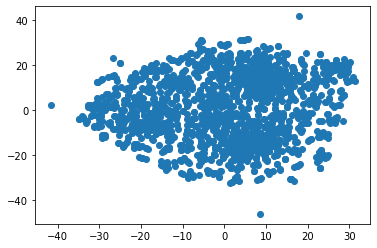

In [12]:
visualize_embeddings(item_item_based.movie_embeddings)